# Fire Prediction
### Loading Data

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

# Load train and test data
import scipy.io
data = scipy.io.loadmat('fireReductionR.mat')
X_train = data['X_train']
y_train = data['Y_train'].ravel()
X_test  = data['X_test']
y_test  = data['Y_test'].ravel()


### Training ###

In [8]:
from fireReduction import train_one_vs_all

lambda_val = 100
weight_vectors, intercepts = train_one_vs_all(X_train, y_train, 3, lambda_val)
# display_data(weight_vectors.T) # display weight vectors as images

### Predictions


In [9]:
from fireReduction import predict_one_vs_all

pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)

print("Training Set Accuracy: %f" % (np.mean(pred_train == y_train) * 100))
print("    Test Set Accuracy: %f" % (np.mean( pred_test == y_test) * 100))

Training Set Accuracy: 73.599120
    Test Set Accuracy: 76.569899


## Regularization Experiment

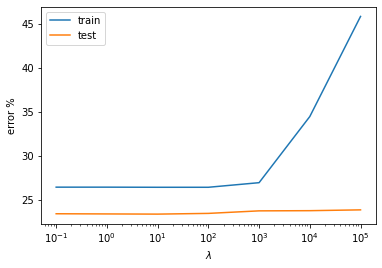

In [25]:
lambda_vals = 10**np.arange(-1., 6.)
num_classes = 3

# Write code here
nvals = len(lambda_vals)
train_acc = np.zeros(nvals)
test_acc = np.zeros(nvals)

for i in range(nvals):
    weight_vectors, intercepts = train_one_vs_all(X_train, y_train, num_classes,lambda_vals[i])
    
    pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
    pred_test = predict_one_vs_all(X_test, weight_vectors, intercepts)
    
    train_acc[i] = np.mean(pred_train == y_train) * 100
    test_acc[i] = np.mean(pred_test == y_test) * 100


# In your final plot, use these commands to provide a legend and set 
# the horizontal axis to have a logarithmic scale so the value of lambda 
# appear evenly spaced.

plt.plot(lambda_vals, 100-train_acc)
plt.plot(lambda_vals, 100-test_acc)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error %')

plt.legend(('train', 'test'))
plt.xscale('log')


## Learning Curve

Precision for NoFire 76.00734921439432 %
Precision for Start 0.0 %
Precision for Fire 70.92507914175167 %


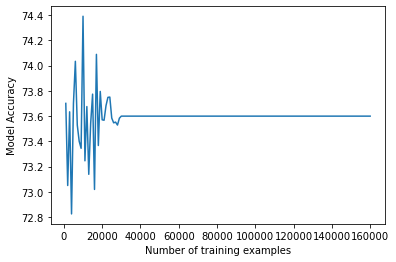

In [44]:
from fireReduction import precisionStart, precisionFire, precisionNoFire
m, n = X_train.shape

train_sizes = np.arange(250, 4000, 250)
nvals = len(X_train)

precisNoFire = np.zeros(160)
precisStart = np.zeros(160)
precisFire = np.zeros(160)
accur = np.zeros(160)
amtTrain = np.zeros(160)

for i in range (160): 
    p = np.random.permutation(m)
    selected_examples = p[0:(i+1)*1000]
    X_train_small = X_train[selected_examples,:]
    y_train_small = y_train[selected_examples]
    lambda_val = 100
    weight_vectors, intercepts = train_one_vs_all(X_train_small, y_train_small, 3, lambda_val)
    pred_train = predict_one_vs_all(X_train_small, weight_vectors, intercepts)
    amtTrain[i] = (i+1)*1000
#     print(pred_train)
#     precis[i] = precision(y_train_small, pred_train)
    precisNoFire[i] = precisionNoFire(y_train_small, pred_train) * 100
    precisStart[i] = precisionStart(y_train_small, pred_train) * 100
    precisFire[i] = precisionFire(y_train_small, pred_train) * 100
    accur[i] = np.mean(pred_train == y_train_small) * 100
plt.plot(amtTrain, accur)
# plt.plot(amtTrain, precis)
plt.xlabel('Number of training examples')
plt.ylabel('Model Accuracy')

print("Precision for NoFire", precisNoFire[-1], "%")
print("Precision for Start", precisStart[-1], "%")
print("Precision for Fire", precisFire[-1], "%")

### Final Testing

In [46]:
weight_vectors, intercepts = train_one_vs_all(X_train, y_train, 3, 100)
pred_train = predict_one_vs_all(X_test, weight_vectors, intercepts)
precisNoFire = precisionNoFire(y_test, pred_train) * 100
precisStart = precisionStart(y_test, pred_train) * 100
precisFire = precisionFire(y_test, pred_train) * 100
accur = np.mean(pred_train == y_test) * 100

print("Results on test set:")
print("Accuracy: ", accur)
print("Precision for NoFire", precisNoFire, "%")
print("Precision for Start", precisStart, "%")
print("Precision for Fire", precisFire, "%")

Results on test set:
Accuracy:  76.56989911467984
Precision for NoFire 80.15051740357478 %
Precision for Start 0.0 %
Precision for Fire 51.404958677685954 %
